<a href="https://colab.research.google.com/github/joshuabae/Animal-Cassification/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [88]:
# !kaggle datasets download -d ronitf/heart-disease-uci
# !ls
# !unzip \*.zip  && rm *.zip

class.csv  heart-disease-uci.zip  kaggle.json  zoo.csv
Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [41]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes

import warnings
warnings.filterwarnings("ignore")

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

In [0]:
class_data = pd.read_csv('class.csv')
zoo_data = pd.read_csv('zoo.csv')

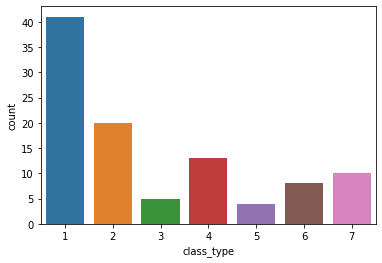

In [92]:
# zoo_data.describe()
sns.countplot(zoo_data['class_type'], label="count")

In [0]:
y_data = zoo_data.class_type
X_data = zoo_data.drop(columns=['class_type'])

# split data randomly and y variable (7 class_type) proportionately
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7, random_state=42, stratify=y_data)

X_train = X_train.drop(columns=['animal_name'])
X_test = X_test.drop(columns=['animal_name'])

In [0]:
# kmeans might not be super accurate because no distance metric can work 
kmeans = KMeans(n_clusters=7, random_state=0).fit(data)
predictions = kmeans.labels_

animals = zoo_data['animal_name']

i = 0
for animal in animals:
  print(animal, predictions[i])
  i += 1

In [0]:
# define the k-modes model
# fit the clusters to the skills dataframe
km = KModes(n_clusters=7, init='Cao', n_init=50)

clusters = km.fit_predict(data)

# Print the cluster centroids
kmodes = km.cluster_centroids_
print(km.cluster_centroids_)

shape = kmodes.shape
print(shape)
# For each cluster mode (a vector of "1" and "0")
# find and print the column headings where "1" appears.
# If no "1" appears, assign to "no-skills" cluster.
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in data.columns[np.nonzero(cent)]:
            print(j)

https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering
